In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv
/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv
/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv
/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv
/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv
/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv
/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv
/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv
/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv
/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PR

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***

# Gathering Data

***

In [91]:
PRSA_Data_Aotizhongxin_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
PRSA_Data_Aotizhongxin_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [92]:
PRSA_Data_Changping_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
PRSA_Data_Changping_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [93]:
PRSA_Data_Dingling_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
PRSA_Data_Dingling_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [94]:
PRSA_Data_Dongsi_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
PRSA_Data_Dongsi_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [95]:
PRSA_Data_Guanyuan_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
PRSA_Data_Guanyuan_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [96]:
PRSA_Data_Gucheng_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
PRSA_Data_Gucheng_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [97]:
PRSA_Data_Huairou_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
PRSA_Data_Huairou_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [98]:
PRSA_Data_Nongzhanguan_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
PRSA_Data_Nongzhanguan_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [99]:
PRSA_Data_Shunyi_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
PRSA_Data_Shunyi_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [100]:
PRSA_Data_Tiantan_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv')
PRSA_Data_Tiantan_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [101]:
PRSA_Data_Wanliu_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')
PRSA_Data_Wanliu_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [102]:
PRSA_Data_Wanshouxigong_20130301 = pd.read_csv('/kaggle/input/air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
PRSA_Data_Wanshouxigong_20130301.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


***
# Assessing Data
#### - Missing value
#### - Invalid value
#### - Duplicate data
#### - Inaccurate value
#### - Inconsistent value
#### - Outlier


1. PRSA_Data_Aotizhongxin_20130301
2. PRSA_Data_Changping_20130301
3. PRSA_Data_Dingling_20130301
4. PRSA_Data_Dongsi_20130301
5. PRSA_Data_Guanyuan_20130301
6. PRSA_Data_Gucheng_20130301
7. PRSA_Data_Huairou_20130301
8. PRSA_Data_Nongzhanguan_20130301
9. PRSA_Data_Shunyi_20130301
10. PRSA_Data_Tiantan_20130301
11. PRSA_Data_Wanliu_20130301
12. PRSA_Data_Wanshouxigong_20130301
***

In [103]:
PRSA_Data_Aotizhongxin_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [104]:
PRSA_Data_Changping_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [105]:
PRSA_Data_Dingling_20130301.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [106]:
PRSA_Data_Dongsi_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [107]:
PRSA_Data_Guanyuan_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [108]:
PRSA_Data_Gucheng_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [109]:
PRSA_Data_Huairou_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [110]:
PRSA_Data_Nongzhanguan_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [111]:
PRSA_Data_Shunyi_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [112]:
PRSA_Data_Tiantan_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [113]:
PRSA_Data_Wanliu_20130301.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [114]:
PRSA_Data_Wanshouxigong_20130301.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


***
# Checking data NaN

1. PRSA_Data_Aotizhongxin_20130301
2. PRSA_Data_Changping_20130301
3. PRSA_Data_Dingling_20130301
4. PRSA_Data_Dongsi_20130301
5. PRSA_Data_Guanyuan_20130301
6. PRSA_Data_Gucheng_20130301
7. PRSA_Data_Huairou_20130301
8. PRSA_Data_Nongzhanguan_20130301
9. PRSA_Data_Shunyi_20130301
10. PRSA_Data_Tiantan_20130301
11. PRSA_Data_Wanliu_20130301
12. PRSA_Data_Wanshouxigong_20130301
***

In [115]:
PRSA_Data_Aotizhongxin_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [116]:
PRSA_Data_Changping_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [117]:
PRSA_Data_Dingling_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [118]:
PRSA_Data_Dongsi_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [119]:
PRSA_Data_Guanyuan_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [120]:
PRSA_Data_Gucheng_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [121]:
PRSA_Data_Huairou_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [122]:
PRSA_Data_Nongzhanguan_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [123]:
PRSA_Data_Shunyi_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [124]:
PRSA_Data_Tiantan_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [125]:
PRSA_Data_Wanliu_20130301.isna().sum()


No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [126]:
PRSA_Data_Wanshouxigong_20130301.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

***
# Cleaning Data

1. PRSA_Data_Aotizhongxin_20130301
2. PRSA_Data_Changping_20130301
3. PRSA_Data_Dingling_20130301
4. PRSA_Data_Dongsi_20130301
5. PRSA_Data_Guanyuan_20130301
6. PRSA_Data_Gucheng_20130301
7. PRSA_Data_Huairou_20130301
8. PRSA_Data_Nongzhanguan_20130301
9. PRSA_Data_Shunyi_20130301
10. PRSA_Data_Tiantan_20130301
11. PRSA_Data_Wanliu_20130301
12. PRSA_Data_Wanshouxigong_20130301

***

In [127]:
# check NaN on PRSA_Data_Aotizhongxin_20130301
PRSA_Data_Aotizhongxin_20130301[PRSA_Data_Aotizhongxin_20130301.SO2.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.0,62.0,NaN,14.0,300.0,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
170,171,2013,3,8,2,339.0,400.0,NaN,162.0,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
627,628,2013,3,27,3,129.0,163.0,NaN,54.0,NaN,NaN,4.3,1001.7,3.0,0.0,W,0.8,Aotizhongxin
628,629,2013,3,27,4,135.0,161.0,NaN,54.0,900.0,2.0,2.9,1001.5,1.9,0.0,W,0.9,Aotizhongxin
629,630,2013,3,27,5,135.0,153.0,NaN,64.0,1000.0,2.0,2.8,1001.4,2.2,0.0,SSW,0.5,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
34912,34913,2017,2,22,16,131.0,131.0,NaN,95.0,NaN,47.0,6.0,1017.0,-4.2,0.0,WNW,1.2,Aotizhongxin
35027,35028,2017,2,27,11,122.0,122.0,NaN,NaN,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [128]:
#  cleaning NaN value
PRSA_Data_Aotizhongxin_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Changping_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Dingling_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Dongsi_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Guanyuan_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Gucheng_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Huairou_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Nongzhanguan_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Shunyi_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Tiantan_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Wanliu_20130301.fillna(value="Prefer not to say", inplace=True)
PRSA_Data_Wanshouxigong_20130301.fillna(value="Prefer not to say", inplace=True)
                                       

In [129]:
#  look good 
PRSA_Data_Aotizhongxin_20130301[PRSA_Data_Aotizhongxin_20130301.SO2.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


***
# check after cleaning NaN value
***

In [130]:
# check PRSA_Data_Aotizhongxin_20130301 NaN value
PRSA_Data_Aotizhongxin_20130301.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [131]:
PRSA_Data_Changping_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [132]:
PRSA_Data_Dingling_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [133]:
PRSA_Data_Dongsi_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [134]:
PRSA_Data_Guanyuan_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [135]:
PRSA_Data_Gucheng_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [136]:
PRSA_Data_Huairou_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [137]:
PRSA_Data_Nongzhanguan_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [138]:
PRSA_Data_Shunyi_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [139]:
PRSA_Data_Tiantan_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [140]:
PRSA_Data_Wanliu_20130301.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [141]:
PRSA_Data_Wanshouxigong_20130301.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

*** 
# check duplicated
***

In [142]:

PRSA_Data_Aotizhongxin_20130301.duplicated().sum()

0

In [143]:
PRSA_Data_Changping_20130301.duplicated().sum()


0

In [144]:
PRSA_Data_Aotizhongxin_20130301.duplicated().sum()


0

In [145]:
PRSA_Data_Changping_20130301.duplicated().sum()


0

In [146]:
PRSA_Data_Dingling_20130301.duplicated().sum()

0

In [147]:
PRSA_Data_Dongsi_20130301.duplicated().sum()


0

In [148]:
PRSA_Data_Guanyuan_20130301.duplicated().sum()


0

In [149]:
PRSA_Data_Gucheng_20130301.duplicated().sum()


0

In [150]:
PRSA_Data_Huairou_20130301.duplicated().sum()


0

In [151]:
PRSA_Data_Nongzhanguan_20130301.duplicated().sum()


0

In [152]:
PRSA_Data_Shunyi_20130301.duplicated().sum()


0

In [153]:
PRSA_Data_Tiantan_20130301.duplicated().sum()


0

In [154]:
PRSA_Data_Wanliu_20130301.duplicated().sum()


0

In [155]:
PRSA_Data_Wanshouxigong_20130301.duplicated().sum()

0

***
# Data Exploratory
***

In [156]:
dataframes = [
    PRSA_Data_Aotizhongxin_20130301,
    PRSA_Data_Changping_20130301,
    PRSA_Data_Dingling_20130301,
    PRSA_Data_Dongsi_20130301,
    PRSA_Data_Guanyuan_20130301,
    PRSA_Data_Gucheng_20130301,
    PRSA_Data_Huairou_20130301,
    PRSA_Data_Nongzhanguan_20130301,
    PRSA_Data_Shunyi_20130301,
    PRSA_Data_Tiantan_20130301,
    PRSA_Data_Wanliu_20130301,
    PRSA_Data_Wanshouxigong_20130301
]

# Concatenate all the DataFrames vertically into one DataFrame
all_data = pd.concat(dataframes, axis=0, ignore_index=True)

In [157]:
all_data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.0,420768,420768.0,420768,420768.0,420768.0,420768.0,420768.0,420768.0,420768.0,420768,420768.0,420768
unique,NaN,NaN,NaN,NaN,NaN,889.0,1085,692.0,1213,133.0,1599.0,2035.0,727.0,646.0,254.0,17,118.0,12
top,NaN,NaN,NaN,NaN,NaN,3.0,Prefer not to say,2.0,Prefer not to say,300.0,2.0,3.0,1019.0,17.6,0.0,NE,1.1,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,8810.0,6449,98557.0,12116,32308.0,42327.0,3414.0,2948.0,1559.0,403858.0,43335,22249.0,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
all_data['TEMP'] = pd.to_numeric(all_data['TEMP'], errors='coerce')

# Get the maximum value from the 'TEMP' column
max_temp = all_data['TEMP'].max()

# Find rows where the 'TEMP' column equals the maximum value
max_temp_rows = all_data[all_data['TEMP'] == max_temp]
max_temp_rows

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
186230,10911,2014,5,29,14,21.0,51.0,3.0,22.0,200.0,132.0,41.6,988.7,3.8,0.0,W,3.3,Gucheng


In [159]:
all_data['TEMP'] = pd.to_numeric(all_data['TEMP'], errors='coerce')

# Get the maximum value from the 'TEMP' column
min_temp = all_data['TEMP'].min()

# Find rows where the 'TEMP' column equals the maximum value
min_temp_rows = all_data[all_data['TEMP'] == min_temp]
min_temp_rows

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
235803,25420,2016,1,24,3,4.0,23.0,2.0,4.0,300.0,44.0,-19.9,1033.6,-28.6,0.0,NNE,1.0,Huairou


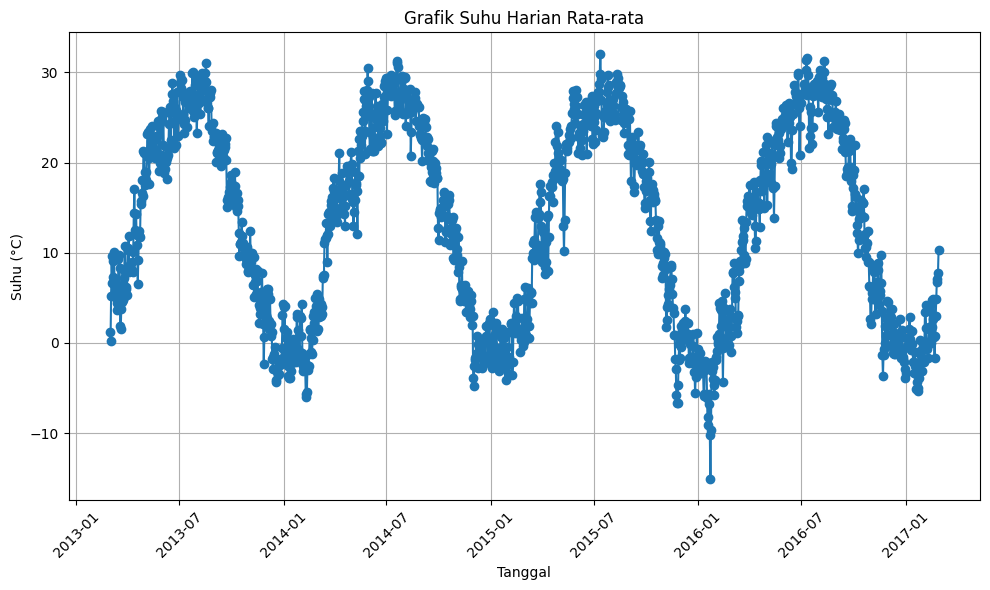

In [160]:
all_data['Tanggal'] = pd.to_datetime(all_data[['year', 'month', 'day', 'hour']])

# Menyiapkan data harian rata-rata suhu
suhu_harian = all_data.groupby(all_data['Tanggal'].dt.date)['TEMP'].mean()

# Menggambar grafik suhu harian
plt.figure(figsize=(10, 6))
plt.plot(suhu_harian.index, suhu_harian.values, marker='o', linestyle='-')
plt.title('Grafik Suhu Harian Rata-rata')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

In [161]:
all_data['Tanggal']

0        2013-03-01 00:00:00
1        2013-03-01 01:00:00
2        2013-03-01 02:00:00
3        2013-03-01 03:00:00
4        2013-03-01 04:00:00
                 ...        
420763   2017-02-28 19:00:00
420764   2017-02-28 20:00:00
420765   2017-02-28 21:00:00
420766   2017-02-28 22:00:00
420767   2017-02-28 23:00:00
Name: Tanggal, Length: 420768, dtype: datetime64[ns]

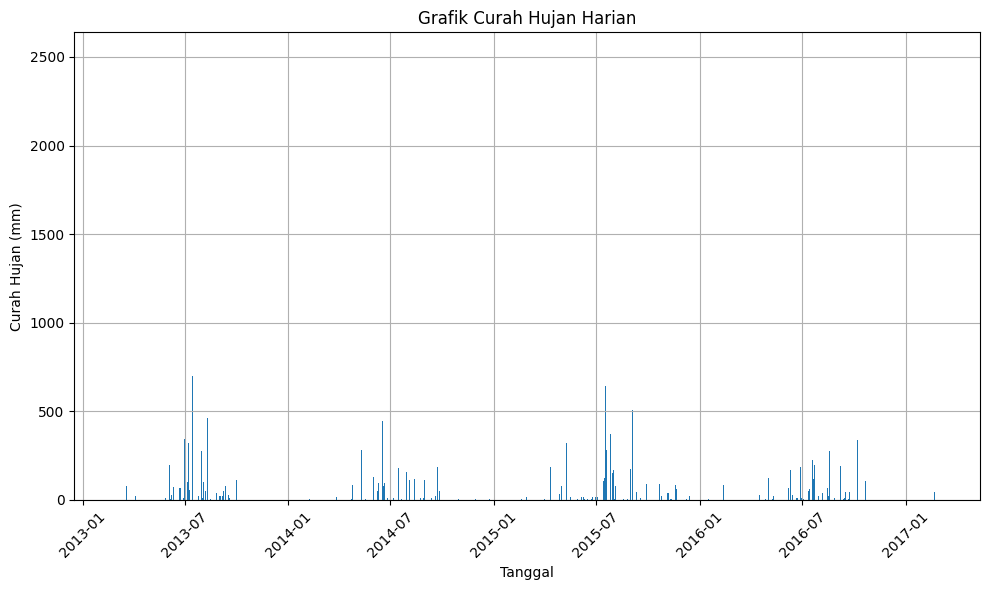

In [162]:
all_data['RAIN'] = pd.to_numeric(all_data['RAIN'], errors='coerce')

curah_hujan_harian = all_data.groupby(all_data['Tanggal'].dt.date)['RAIN'].sum()

# Menggambar grafik curah hujan harian
plt.figure(figsize=(10, 6))
plt.bar(curah_hujan_harian.index, curah_hujan_harian.values)
plt.title('Grafik Curah Hujan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()


In [163]:
all_data = all_data.replace('Prefer not to say', np.nan)

all_data['SO2'] = pd.to_numeric(all_data['SO2'], errors='coerce')
all_data['NO2'] = pd.to_numeric(all_data['NO2'], errors='coerce')
all_data['CO'] = pd.to_numeric(all_data['CO'], errors='coerce')
all_data['PM2.5'] = pd.to_numeric(all_data['PM2.5'], errors='coerce')
all_data['PM10'] = pd.to_numeric(all_data['PM10'], errors='coerce')
all_data['TEMP'] = pd.to_numeric(all_data['TEMP'], errors='coerce')


# Memilih kolom-kolom yang ingin Anda analisis (misalnya, polusi udara dan parameter kesehatan)
kolom_polusi_udara = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']
kolom_suhu = ['TEMP']

# Menghitung matriks korelasi antara polusi udara dan kesehatan masyarakat
korelasi = all_data[kolom_polusi_udara + kolom_suhu].corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(korelasi)


Matriks Korelasi:
            SO2       NO2        CO        O3     PM2.5      PM10      TEMP
SO2    1.000000  0.499496  0.535750 -0.165341  0.482354  0.462651 -0.321799
NO2    0.499496  1.000000  0.705500 -0.471587  0.666948  0.652193 -0.278192
CO     0.535750  0.705500  1.000000 -0.313012  0.789998  0.702363 -0.326237
O3    -0.165341 -0.471587 -0.313012  1.000000 -0.149697 -0.111294  0.594910
PM2.5  0.482354  0.666948  0.789998 -0.149697  1.000000  0.884380 -0.131127
PM10   0.462651  0.652193  0.702363 -0.111294  0.884380  1.000000 -0.096209
TEMP  -0.321799 -0.278192 -0.326237  0.594910 -0.131127 -0.096209  1.000000


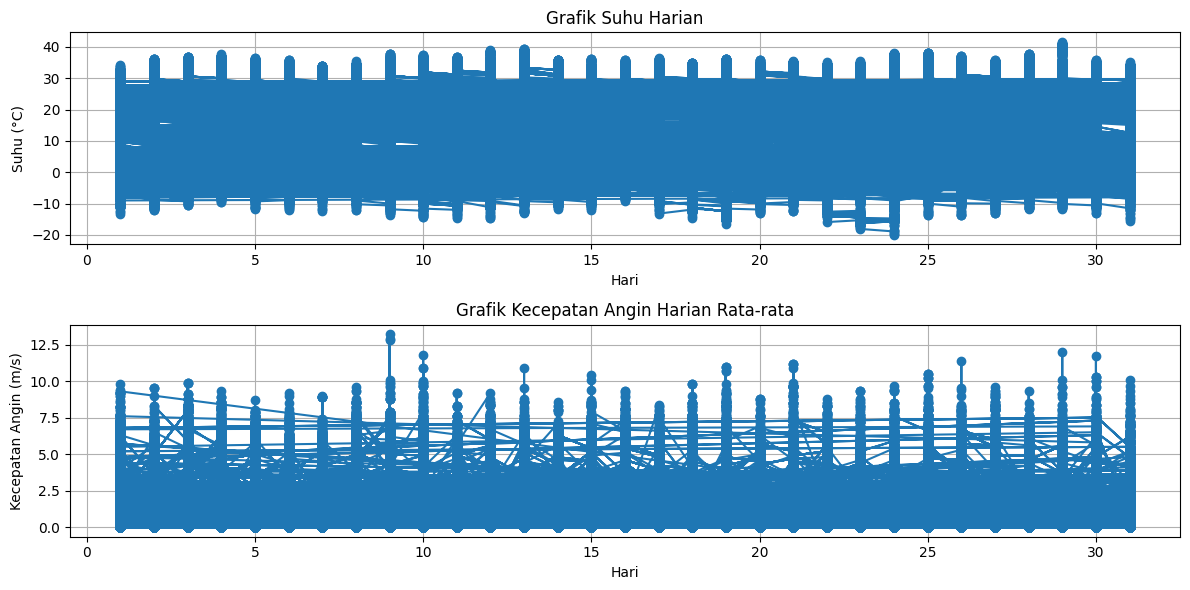

In [164]:
# Memilih kolom arah angin (wd) dan kecepatan angin (wspm)
kolom_cuaca = ['month', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'RAIN']
kolom_angin = ['wd', 'WSPM']

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(all_data['day'], all_data['TEMP'], marker='o', linestyle='-')
plt.title('Grafik Suhu Harian')
plt.xlabel('Hari')
plt.ylabel('Suhu (°C)')
plt.grid(True)

# Menampilkan grafik kecepatan angin harian rata-rata
plt.subplot(2, 1, 2)
plt.plot(all_data['day'], all_data['WSPM'], marker='o', linestyle='-')
plt.title('Grafik Kecepatan Angin Harian Rata-rata')
plt.xlabel('Hari')
plt.ylabel('Kecepatan Angin (m/s)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [165]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    412029 non-null  float64       
 6   PM10     414319 non-null  float64       
 7   SO2      411747 non-null  float64       
 8   NO2      408652 non-null  float64       
 9   CO       400067 non-null  float64       
 10  O3       407491 non-null  float64       
 11  TEMP     420370 non-null  float64       
 12  PRES     420375 non-null  float64       
 13  DEWP     420365 non-null  float64       
 14  RAIN     420378 non-null  float64       
 15  wd       418946 non-null  object        
 16  WSPM     420450 non-null  float64       
 17  station  4

In [166]:
grouped_data = all_data.groupby('station')[['PM2.5', 'PM10']].mean()

# Menampilkan data hasil group by
print(grouped_data)

                   PM2.5        PM10
station                             
Aotizhongxin   82.773611  110.060391
Changping      71.099743   94.657871
Dingling       65.989497   83.739723
Dongsi         86.194297  110.336742
Guanyuan       82.933372  109.023303
Gucheng        83.852089  118.861978
Huairou        69.626367   91.482690
Nongzhanguan   84.838483  108.991096
Shunyi         79.491602   98.737026
Tiantan        82.164911  106.363672
Wanliu         83.374716  110.464618
Wanshouxigong  85.024136  112.223459


In [167]:
grouped_data = all_data.groupby('station')[['PM2.5', 'PM10']].min()

# Menampilkan data hasil group by
print(grouped_data)

               PM2.5  PM10
station                   
Aotizhongxin     3.0   2.0
Changping        2.0   2.0
Dingling         3.0   2.0
Dongsi           3.0   2.0
Guanyuan         2.0   2.0
Gucheng          2.0   2.0
Huairou          2.0   2.0
Nongzhanguan     2.0   2.0
Shunyi           2.0   2.0
Tiantan          3.0   2.0
Wanliu           2.0   2.0
Wanshouxigong    3.0   2.0


In [168]:
grouped_data = all_data.groupby('station')[['PM2.5', 'PM10']].max()

# Menampilkan data hasil group by
print(grouped_data)

               PM2.5   PM10
station                    
Aotizhongxin   898.0  984.0
Changping      882.0  999.0
Dingling       881.0  905.0
Dongsi         737.0  955.0
Guanyuan       680.0  999.0
Gucheng        770.0  994.0
Huairou        762.0  993.0
Nongzhanguan   844.0  995.0
Shunyi         941.0  999.0
Tiantan        821.0  988.0
Wanliu         957.0  951.0
Wanshouxigong  999.0  961.0


In [169]:
all_data['Tanggal'] = pd.to_datetime(all_data[['year', 'month', 'day']], format='%Y-%m-%d')

# Menyimpan kolom yang akan digunakan dalam laporan harian
columns_to_keep = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

# Membuat DataFrame baru dengan data harian
daily_report = all_data.groupby(all_data['Tanggal'])[columns_to_keep].agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean',
                                                                   'NO2': 'mean', 'CO': 'mean', 'O3': 'mean',
                                                                   'TEMP': 'mean', 'PRES': 'mean', 'DEWP': 'mean',
                                                                   'RAIN': 'sum', 'WSPM': 'mean', 'station': 'first'})
# Menampilkan laporan harian
print(daily_report)





                 PM2.5        PM10        SO2         NO2           CO  \
Tanggal                                                                  
2013-03-01    7.326389   12.255245   9.280142   21.405738   406.737589   
2013-03-02   31.475694   40.616725  32.007989   56.704889   948.367491   
2013-03-03   79.291667  111.104167  49.386760   77.021429  1773.306620   
2013-03-04   21.731449   40.601399  18.805865   43.134273   727.923077   
2013-03-05  132.439114  159.236111  71.333333  104.256506  2047.232143   
...                ...         ...        ...         ...          ...   
2017-02-24   25.286713   38.472028   9.534965   44.614286   716.783217   
2017-02-25   11.392226   21.583039   5.590106   30.402827   469.611307   
2017-02-26   27.785965   45.066667  10.021053   50.463158   703.157895   
2017-02-27   66.804511   97.183521  16.569811   76.162264  1332.075472   
2017-02-28   14.945848   28.853047   6.448905   32.700730   515.693431   

                   O3       TEMP     

In [188]:
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2013-03-28")
selected_option = 'Aotizhongxin'

filtered_df = all_data[(all_data['Tanggal'] >= pd.to_datetime(start_date)) & (all_data['Tanggal'] <= pd.to_datetime(end_date)) & (all_data['station'] == selected_option)]

filtered_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Tanggal
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,668,2013,3,28,19,49.0,146.0,14.0,42.0,700.0,62.0,8.5,1014.9,-1.9,0.0,SW,3.6,Aotizhongxin,2013-03-28
668,669,2013,3,28,20,95.0,193.0,22.0,70.0,1100.0,40.0,8.2,1015.6,-1.9,0.0,SW,1.4,Aotizhongxin,2013-03-28
669,670,2013,3,28,21,109.0,176.0,25.0,80.0,1300.0,33.0,6.4,1016.2,-2.2,0.0,S,0.4,Aotizhongxin,2013-03-28
670,671,2013,3,28,22,108.0,159.0,26.0,93.0,1500.0,20.0,4.6,1016.1,-1.8,0.0,WSW,0.2,Aotizhongxin,2013-03-28


*** 
# DF

1. PRSA_Data_Aotizhongxin_20130301
2. PRSA_Data_Changping_20130301
3. PRSA_Data_Dingling_20130301
4. PRSA_Data_Dongsi_20130301
5. PRSA_Data_Guanyuan_20130301
6. PRSA_Data_Gucheng_20130301
7. PRSA_Data_Huairou_20130301
8. PRSA_Data_Nongzhanguan_20130301
9. PRSA_Data_Shunyi_20130301
10. PRSA_Data_Tiantan_20130301
11. PRSA_Data_Wanliu_20130301
12. PRSA_Data_Wanshouxigong_20130301

***

In [ ]:
all_data.to_csv("all_data.csv", index=False)